In [53]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from Data_extraction import Get_data
import Model
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [63]:
ratio_tr_te = 70
batch_size = 100

In [64]:
samples, labels = Get_data('Aigle', ['senegal', 'medi', 'us'], Normalized = False)

length_tr = int(len(labels)*(ratio_tr_te/100))
num_batch_train = np.ceil(length_tr/batch_size)
num_batch_test = np.ceil((len(labels)-length_tr)/batch_size)

samples = torch.tensor(samples, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.float32)

train_dataset = TensorDataset(samples[:length_tr], labels[:length_tr])
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(samples[length_tr:], labels[length_tr:])
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)


8885
Returns 2D-numpy array with rows per day and with columns: nao, oni, [sst] and Returns 1D-numpy array with the monthly rain sum as labels


In [65]:
num_layer = 1
nn_dim = 3000

model = Model.MLP(
        input_dim=len(samples[0]),
        nn_dim=nn_dim, 
        out_dim=1, 
        num_layers=num_layer, 
        bias=False, 
        norm= 'mf'
    )

In [66]:
eta = 0.01
num_epochs = 1000
freq = 1

train_error = np.zeros(num_epochs)
test_error = np.zeros(num_epochs)

optimiser = optim.SGD(model.parameters(), eta)
loss_fct = nn.MSELoss(reduction='mean')

print(model(samples[1]))

tensor([0.0531], grad_fn=<DivBackward0>)


In [ ]:
for i in range(num_epochs):
    if i%10 == 0:
        print(f'Epoch: {i}')
        
    optimiser.zero_grad()
    for input, label in train_loader:
        
        output = model(input).squeeze()
        loss = loss_fct(output, label)
        loss.backward() 
        optimiser.step()
        optimiser.zero_grad()
        
    if i%freq==0:
        index = int(i/freq)
        for input, label in train_loader:
            with torch.no_grad():
                train_error[index] += loss_fct(model(input).squeeze(),label).item()/num_batch_train
        for input, label in test_loader:
            with torch.no_grad():
                test_error[index] += loss_fct(model(input).squeeze(),label).item()/num_batch_test

Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40
Epoch: 50
Epoch: 60
Epoch: 70
Epoch: 80
Epoch: 90
Epoch: 100
Epoch: 110
Epoch: 120
Epoch: 130
Epoch: 140
Epoch: 150
Epoch: 160
Epoch: 170
Epoch: 180
Epoch: 190
Epoch: 200
Epoch: 210
Epoch: 220
Epoch: 230
Epoch: 240
Epoch: 250
Epoch: 260
Epoch: 270
Epoch: 280
Epoch: 290
Epoch: 300
Epoch: 310
Epoch: 320
Epoch: 330
Epoch: 340
Epoch: 350
Epoch: 360
Epoch: 370
Epoch: 380
Epoch: 390
Epoch: 400
Epoch: 410
Epoch: 420
Epoch: 430
Epoch: 440
Epoch: 450
Epoch: 460
Epoch: 470
Epoch: 480
Epoch: 490
Epoch: 500
Epoch: 510
Epoch: 520
Epoch: 530
Epoch: 540
Epoch: 550
Epoch: 560
Epoch: 570
Epoch: 580
Epoch: 590
Epoch: 600
Epoch: 610
Epoch: 620
Epoch: 630
Epoch: 640
Epoch: 650
Epoch: 660
Epoch: 670
Epoch: 680


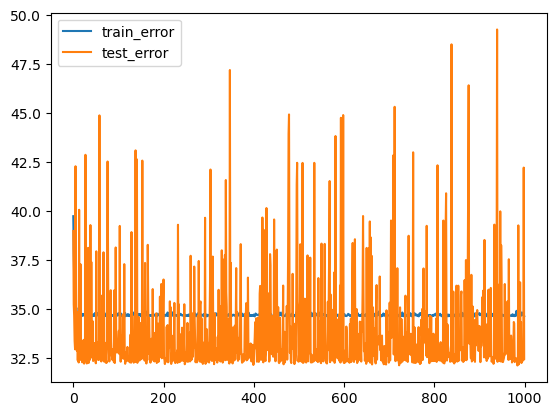

In [ ]:
plt.figure()
plt.plot(train_error, label='train_error')
plt.plot(test_error, label='test_error')
plt.legend()